# Proyecto 01: Predicción de Precios y Demanda de Hoteles 🏨

Este notebook utiliza el dataset **Hotel Booking Demand** de Kaggle:
[Hotel Booking Demand Dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

Flujo del notebook:
1. Exploración y análisis de datos (EDA).
2. Preprocesamiento.
3. Modelado (regresión y clasificación).
4. Evaluación de resultados.
---

## 1. Importar librerías

In [124]:
#%pip install matplotlib seaborn pandas numpy scikit-learn xgboost lightgbm catboost optuna mlflow shap missingno

In [125]:
#%pip freeze > requirements.txt


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


import xgboost as xgb

## 2. Cargar dataset
Descarga el dataset desde Kaggle y colócalo en la carpeta `data/`.

In [145]:
# Cargar dataset
data = pd.read_csv("C:\\Users\\Danilo\\Documents\\Proyectos Full\\IA\\AI-Portfolio-DaniloRivera\\Proyecto01_Prediccion_Precios_Hoteles\\data\\hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 3. Exploración de datos (EDA)

In [149]:
print(data.shape)

(119390, 32)


In [150]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [151]:
print(data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [152]:
# Valores nulos
print(data.isnull().sum().sort_values(ascending=False).head(20))

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
dtype: int64


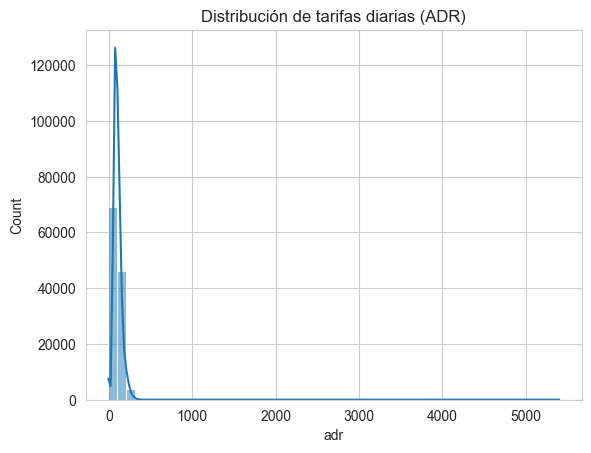

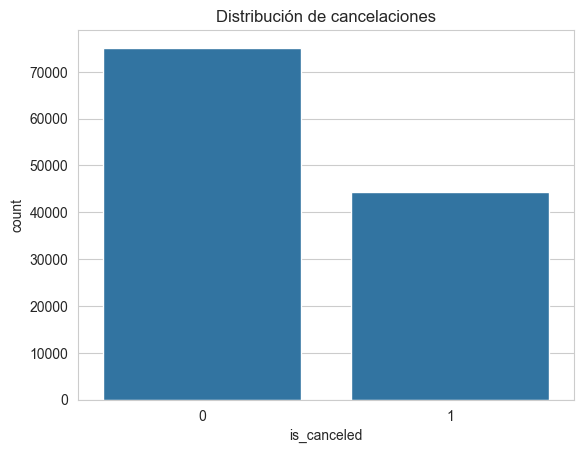

In [153]:

# Visualización simple de la variable objetivo adr (precio por noche)
sns.histplot(data['adr'], bins=50, kde=True)
plt.title('Distribución de tarifas diarias (ADR)')
plt.show()

# Cancelaciones
sns.countplot(x='is_canceled', data=data)
plt.title('Distribución de cancelaciones')
plt.show()

Ver outliers del ADR (variable a predecir):

In [182]:
data['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.628648
1    0.371352
Name: proportion, dtype: float64

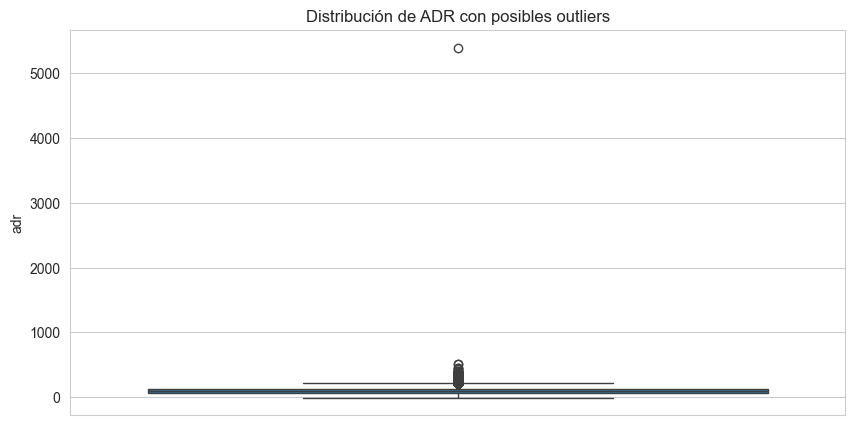

In [156]:
#Esto muestra si existen tarifas diarias demasiado altas o bajas en comparación con la mayoría
plt.figure(figsize=(10,5))
sns.boxplot(y=data["adr"])
plt.title("Distribución de ADR con posibles outliers")
plt.show()

Comparar ADR según una categoría (ejemplo: tipo de hotel):

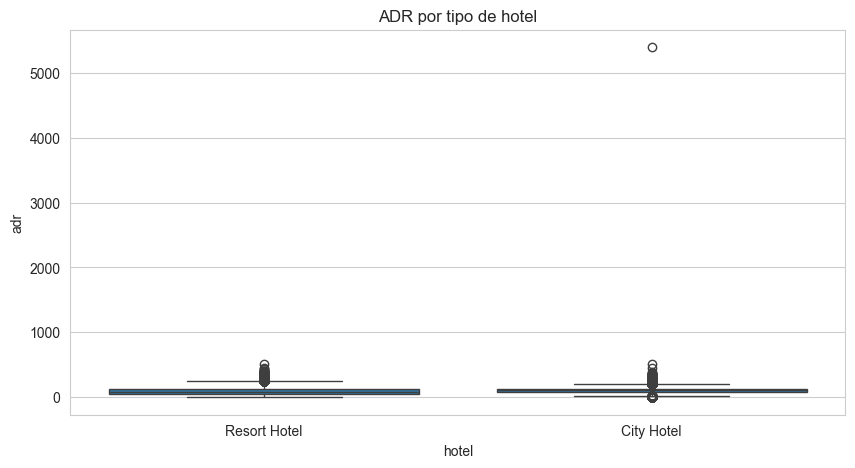

In [134]:
plt.figure(figsize=(10,5))
sns.boxplot(x="hotel", y="adr", data=data)
plt.title("ADR por tipo de hotel")
plt.show()

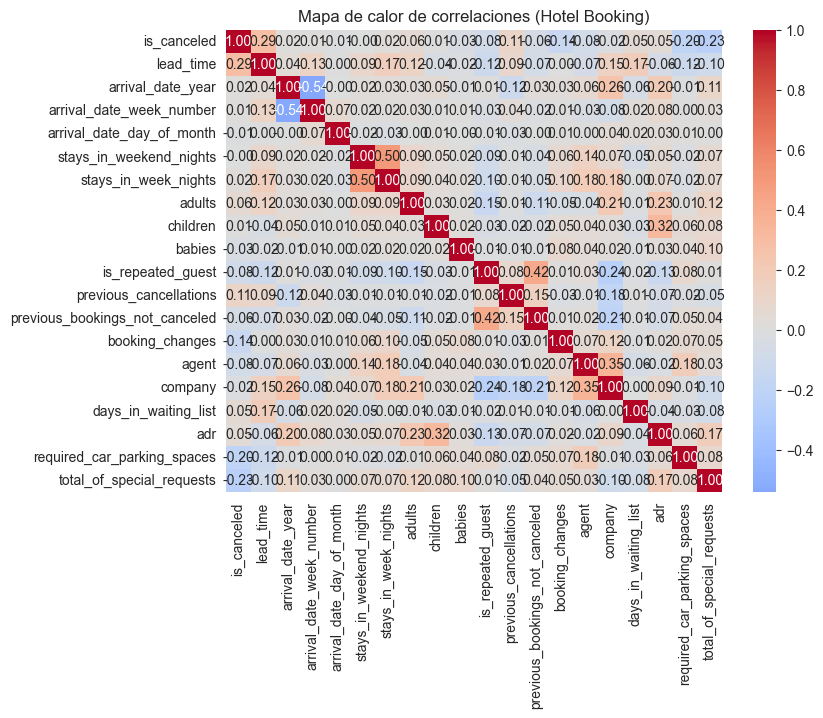

In [157]:
#Calcular la matriz de correlación
corr = data.select_dtypes(include='number').corr()

# Graficar mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Mapa de calor de correlaciones (Hotel Booking)")
plt.show()

## 4. Preprocesamiento
- Tratamiento de nulos.
- Codificación de variables categóricas.
- División train/test.

In [159]:
# 1. Eliminar nulos en columnas importantes
data = data.dropna(subset=['adr', 'is_canceled', 'hotel', 'country','children'])

In [160]:
#borrando las columnas con una cantidad excesiva de NaN
data = data.drop(columns=['company', 'agent'])

In [161]:
print(data.shape)

(118898, 30)


In [183]:
# Variable objetivo
y = data["is_canceled"]

# Features (quitamos la target)
X = data.drop(columns=['is_canceled', 'reservation_status', 'reservation_status_date'])

In [184]:
# 2. Identificar variables numéricas y categóricas
categorical = X.select_dtypes(include=["object"]).columns
numeric = X.select_dtypes(include=[np.number]).columns

In [185]:
# 3. Preprocesamiento para pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ]
)


In [186]:
#4. Definir modelos y parámetros

models = {
    "LogisticRegression": (LogisticRegression(max_iter=500, solver="liblinear"), {
        "clf__C": [0.1, 1, 10]
    }),
    "RandomForest": (RandomForestClassifier(random_state=42), {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [10, 20, None]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42), {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [3, 6, 10]
    }),
    "LightGBM": (LGBMClassifier(random_state=42, verbose=-1), {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [-1, 10, 20],
        "clf__learning_rate": [0.05, 0.1]
    }),
    "CatBoost": (CatBoostClassifier(verbose=0, random_state=42), {
        "clf__depth": [6, 10],
        "clf__learning_rate": [0.05, 0.1],
        "clf__iterations": [200]
    })
}

In [187]:
# 5. División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

results = {}

## 5. Modelado


### Problema #1 de - **Clasificación**: Predicción de `is_canceled` (cancelación).
- objetivo: Predicción de cancelaciones con buena precisión.

In [189]:
# 6. Entrenar con GridSearchCV
for name, (model, params) in models.items():
    print(f"\nEntrenando {name}...")
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", model)
    ])
    grid = GridSearchCV(pipeline, param_grid=params, cv=3, scoring="roc_auc", n_jobs=-1)
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]) if hasattr(grid.best_estimator_["clf"], "predict_proba") else None
    
    results[name] = {
        "best_params": grid.best_params_,
        "roc_auc": auc,
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }


Entrenando LogisticRegression...

Entrenando RandomForest...

Entrenando XGBoost...


C:\Users\Danilo\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [17:05:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Entrenando LightGBM...

Entrenando CatBoost...


In [190]:
# 7. Mostrar resultados
results_df = pd.DataFrame({
    model: {
        "ROC_AUC": results[model]["roc_auc"],
        "Precision (0)": results[model]["classification_report"]["0"]["precision"],
        "Recall (0)": results[model]["classification_report"]["0"]["recall"],
        "Precision (1)": results[model]["classification_report"]["1"]["precision"],
        "Recall (1)": results[model]["classification_report"]["1"]["recall"]
    }
    for model in results
}).T

print("\nResultados comparativos:")
print(results_df)


Resultados comparativos:
                     ROC_AUC  Precision (0)  Recall (0)  Precision (1)  \
LogisticRegression  0.900111       0.821355    0.909760       0.813210   
RandomForest        0.957368       0.889492    0.942806       0.892250   
XGBoost             0.957668       0.902698    0.926550       0.869844   
LightGBM            0.949238       0.885467    0.923139       0.859793   
CatBoost            0.951420       0.885453    0.925079       0.862779   

                    Recall (1)  
LogisticRegression    0.665044  
RandomForest          0.801721  
XGBoost               0.830936  
LightGBM              0.797871  
CatBoost              0.797418  


### Mejor modelo

In [195]:
# Codificación de variables categóricas (one-hot encoding)
features_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [196]:
# Modelo boosting: XGBoost (clasificación)
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

In [197]:
def evaluar_clasificacion(y_true, y_pred, nombre):
    acc = accuracy_score(y_true, y_pred)
    print(f"{nombre} -> Accuracy: {acc:.2f}")
    print(classification_report(y_true, y_pred))

# Evaluación ejemplos:
evaluar_clasificacion(y_test, y_pred_xgb, "XGBoost - Cancelación")

XGBoost - Cancelación -> Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14949
           1       0.85      0.78      0.82      8831

    accuracy                           0.87     23780
   macro avg       0.86      0.85      0.86     23780
weighted avg       0.87      0.87      0.87     23780



### Problema #2 de -  **Regresión**: Predicción de `adr` (precio por noche).
- Objetivo: predicciones de tarifas diarias (adr) con baja desviación.

In [198]:
X = data.drop(columns=['adr', 'reservation_status', 'reservation_status_date'])
y = data['adr']

### feature selection **(seleccionar las mejores caracteristicas)**

In [ ]:
# Modelo de clasificación: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_

In [ ]:
#Extraer importancias y compararlas

# Crear Series de importancias
feat_importances = pd.Series(importances, index=X_train.columns)

# Seleccionar las 15 más importantes y ordenarlas de mayor a menor
top_features = feat_importances.nlargest(15).sort_values()

# Configuración de estilo
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")

# Gráfico horizontal con color y valores al final de cada barra
ax = top_features.plot(kind='barh', color='skyblue', edgecolor='black')
for i, v in enumerate(top_features):
    ax.text(v + 0.01*v, i, f"{v:.3f}", color='black', va='center')

# Títulos y etiquetas
plt.title("Top 15 Features por Importancia", fontsize=16)
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

In [199]:
# 2. Identificar variables numéricas y categóricas
categorical = X.select_dtypes(include=["object"]).columns
numeric = X.select_dtypes(include=[np.number]).columns

In [200]:
# 3. Preprocesamiento para pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ]
)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
# Modelos y grids de hiperparámetros
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor


models_params = {
    # 'RandomForest': {
    #     'model': RandomForestRegressor(random_state=42),
    #     'params': {
    #         'regressor__n_estimators': [100, 200],
    #         'regressor__max_depth': [None, 10, 20]
    #     }
    # },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, eval_metric='rmse', use_label_encoder=False),
        'params': {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [3, 6, 10],
            'regressor__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    # 'Ridge': {
    #     'model': Ridge(random_state=42),
    #     'params': {
    #         'regressor__alpha': [0.1, 1.0, 10.0]
    #     }
    # },
    # 'Lasso': {
    #     'model': Lasso(),
    #     'params': {
    #         'regressor__alpha': [0.001, 0.01, 0.1, 1.0]
    #     }
    # }
}


In [211]:
#  Entrenamiento con GridSearchCV/RandomizedSearchCV
results = {}

for name, mp in models_params.items():
    print(f"Entrenando {name}...")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', mp['model'])
    ])
    
    # Elegir GridSearchCV para todos
    grid = GridSearchCV(
        pipeline,
        param_grid=mp['params'],
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

Entrenando XGBoost...


C:\Users\Danilo\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [19:16:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [212]:
# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results[name] = {
    'Best Params': grid.best_params_,
    'RMSE': rmse,
    'MAE': mae,
    'R2': r2
}

# Mostrar resultados
summary = pd.DataFrame(results).T
print(summary)

                                               Best Params       RMSE  \
XGBoost  {'regressor__learning_rate': 0.2, 'regressor__...  16.079366   

              MAE        R2  
XGBoost  8.840863  0.885809  


In [ ]:
# Modelo boosting: XGBoost (regresión)
xgb_reg = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_reg.predict(X_test)

## 6. Evaluación de Modelos

In [ ]:
def evaluar_regresion(y_true, y_pred, nombre):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{nombre} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

In [ ]:
# Evaluación ejemplos:
evaluar_regresion(y_test, y_pred, "Random Forest - ADR")

Random Forest - ADR -> MAE: 8.07, RMSE: 22.45, R2: 0.78


In [ ]:
evaluar_regresion(y_test, y_pred_xgb, "XGBoost - ADR")

XGBoost - ADR -> MAE: 12.21, RMSE: 19.90, R2: 0.83


## 7. Features Selection


## 8. Conclusiones y Próximos Pasos
- Analizar las variables que más afectan al precio (`adr`).
- Mejorar hiperparámetros de modelos (GridSearchCV, RandomizedSearchCV).
- Explorar modelos de boosting como LightGBM o CatBoost.
- Profundizar en la predicción de cancelaciones.
- Realizar visualizaciones avanzadas por país, temporada y tipo de hotel.